<a href="https://colab.research.google.com/github/revedev/facial-sketch/blob/main/facial_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install required libraries
!pip install --upgrade diffusers transformers accelerate torch opencv-python
print("Installation complete! You can move to the next step.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 775.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 898.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [11]:
import torch
from diffusers import StableDiffusionPipeline
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 2: Load the Model
# We use a model known for good human anatomy
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda") # Move to GPU

print("Model Loaded Successfully!")

# New function to generate multiple similar photos
def generate_multiple_similar_photos(prompt, num_images=4):
    """
    Generates multiple DIFFERENT facial photos from a single prompt.
    To convert these to sketches, you would apply the `photo_to_sketch` function to each photo.
    """
    enhanced_prompt = (
        f"passport photo of a {prompt}, "
        "neutral lighting, white background, hyperrealistic, 8k, sharp focus, detailed facial features"
    )
    negative_prompt = (
        "cartoon, 3d, painting, anime, disfigured, bad anatomy, "
        "glasses, makeup, jewelry, messy"
    )

    # Removed 'seed' parameter and 'generator' to produce different faces
    print(f"Generating {num_images} different photos for: '{prompt}'...")

    # Generate multiple photos
    photos = pipe(
        enhanced_prompt,
        negative_prompt=negative_prompt,
        height=512,
        width=512,
        num_inference_steps=30,
        num_images_per_prompt=num_images # Key parameter for multiple images
    ).images

    return photos

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model Loaded Successfully!


In [13]:
# Step 3: Define the functions

def photo_to_sketch(image):
    """
    Converts a PIL Image (photo) into a realistic pencil sketch
    using OpenCV computer vision techniques.
    """
    # Convert PIL image to numpy array (OpenCV format)
    open_cv_image = np.array(image)

    # Convert RGB to Grayscale
    gray_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2GRAY)

    # Invert the grayscale image
    inverted_image = 255 - gray_image

    # Blur the inverted image (Gaussian Blur)
    blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

    # Invert the blurred image
    inverted_blurred = 255 - blurred_image

    # Create the pencil sketch by dividing the grayscale image by the inverted blurred image
    sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

    # Convert back to PIL Image to display
    return Image.fromarray(sketch)

def generate_suspect(prompt):
    """
    Generates a face from text, then turns it into a sketch.
    """
    # We add "quality boosters" to your prompt automatically
    enhanced_prompt = (
        f"passport photo of a {prompt}, "
        "neutral lighting, white background, hyperrealistic, 8k, sharp focus, detailed facial features"
    )

    # Negative prompt prevents the AI from making it look like a cartoon or painting
    negative_prompt = (
        "cartoon, 3d, painting, anime, disfigured, bad anatomy, "
        "glasses, makeup, jewelry, messy" # You can remove 'glasses' if you want them
    )

    # 1. Generate the Photo
    print(f"Generating suspect: '{prompt}'...")
    photo = pipe(
        enhanced_prompt,
        negative_prompt=negative_prompt,
        height=512,
        width=512,
        num_inference_steps=30 # Higher = more detail
    ).images[0]

    # 2. Convert to Sketch
    sketch = photo_to_sketch(photo)

    return photo, sketch

Generating suspect: 'brad pitt face with excess face fat '...


  0%|          | 0/30 [00:00<?, ?it/s]

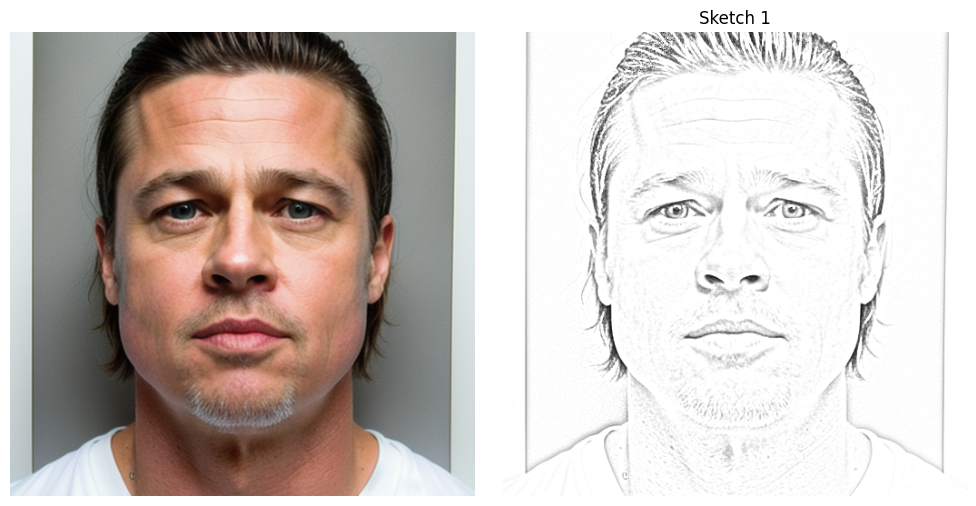


--------------------------------------------------

Generating 3 different photos for: 'brad pitt face with excess face fat '...


  0%|          | 0/30 [00:00<?, ?it/s]

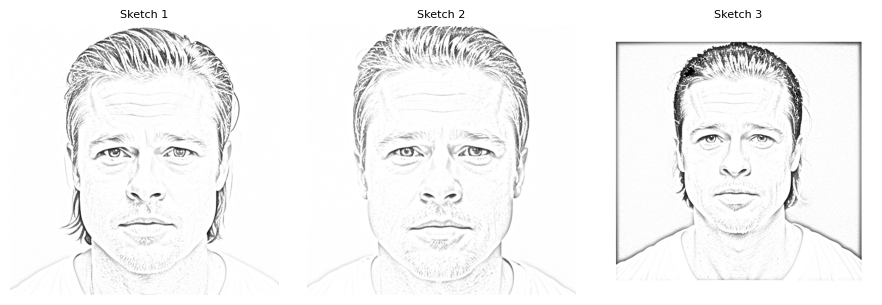

In [59]:
# Step 4 & 5: Generate and Display Suspects (Single and Multiple)

# --- Single Suspect Generation (from original Step 4) ---
user_prompt_single = "brad pitt face with excess face fat "
# Run the generation
reference_photo, final_sketch = generate_suspect(user_prompt_single)

# Display results side-by-side
fig1, axes1 = plt.subplots(1, 2, figsize=(10, 5))
axes1[0].imshow(reference_photo)
axes1[0].set_title("") # Removed title for AI Reference
axes1[0].axis("off")

axes1[1].imshow(final_sketch, cmap="gray")
axes1[1].set_title("Sketch 1") # Simplified title
axes1[1].axis("off")

plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n") # Separator for clarity

# --- Multiple Different Suspects Generation (from original Step 5) ---
user_prompt_multiple = user_prompt_single # Use the same prompt as for single generation
num_sketches_to_generate = 3 # Changed from 3 to 20

similar_photos = generate_multiple_similar_photos(
    user_prompt_multiple,
    num_images=num_sketches_to_generate
)

# Convert each photo to a sketch and display them
# Calculate dynamic grid size for better display of 20 images
num_cols = 5 # Example: 5 columns per row
num_rows = (num_sketches_to_generate + num_cols - 1) // num_cols # Ceiling division

fig2, axes2 = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
axes2 = axes2.flatten() # Flatten the 2D array of axes for easy iteration

for i, photo in enumerate(similar_photos):
    sketch = photo_to_sketch(photo)
    axes2[i].imshow(sketch, cmap="gray")
    axes2[i].set_title(f"Sketch {i+1}", fontsize=8) # Simplified title
    axes2[i].axis("off")

# Hide any unused subplots if num_sketches_to_generate is not a perfect multiple of num_cols
for j in range(i + 1, len(axes2)):
    axes2[j].set_visible(False)

plt.tight_layout()
plt.show()